In [2]:
from transformers import GPT2LMHeadModel

In [2]:
from huggingface_hub import notebook_login

# This will display a widget to paste in your token
notebook_login()

In [ ]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") # 124M
sd_hf = model_hf.state_dict()

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [15]:
for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [5]:
sd_hf["transformer.wpe.weight"].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

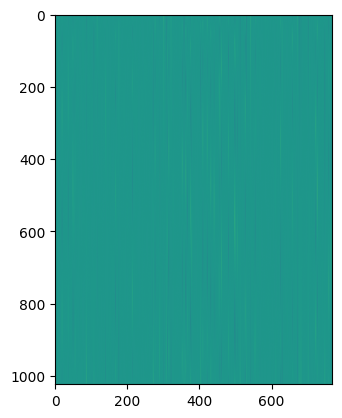

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_hf["transformer.wpe.weight"], cmap="viridis")

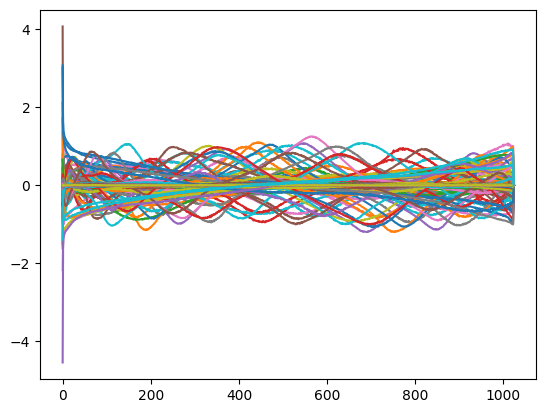

In [11]:
for i in range(700):
    plt.plot(sd_hf["transformer.wpe.weight"][:, i])

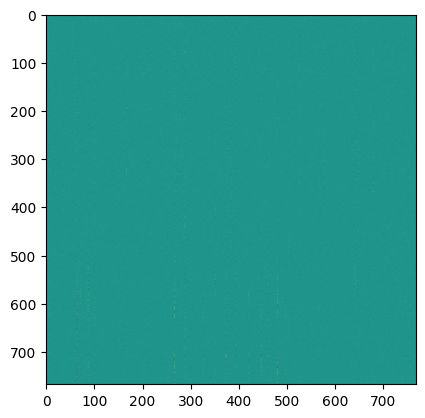

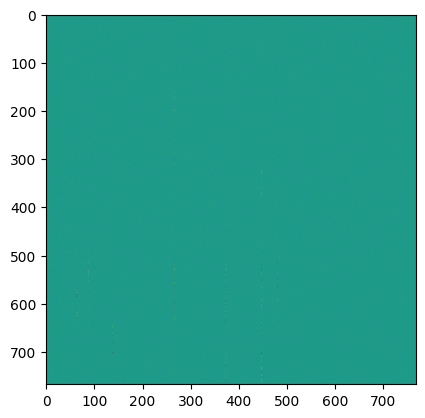

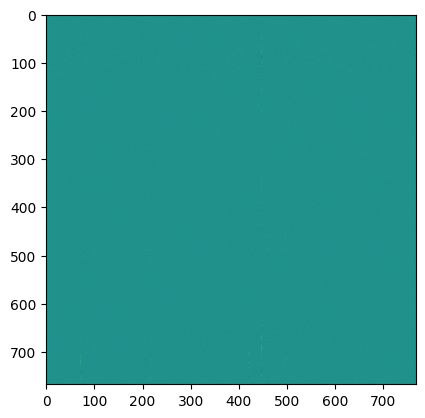

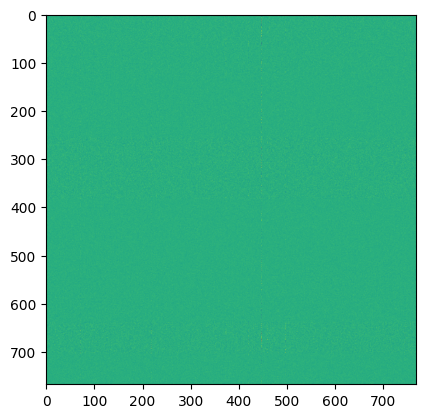

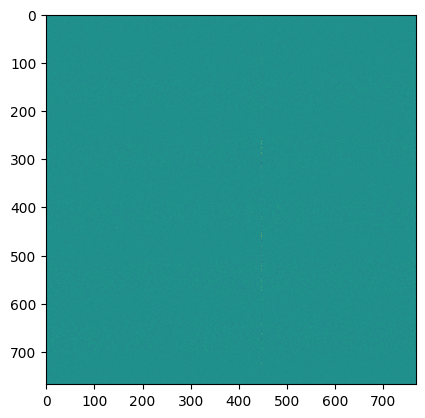

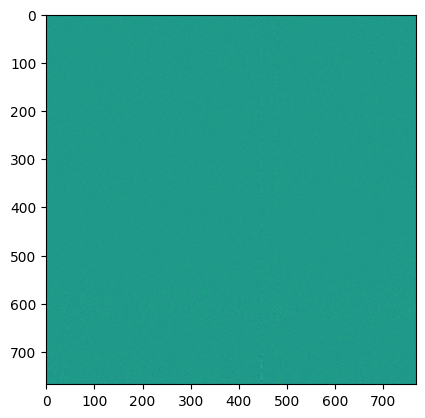

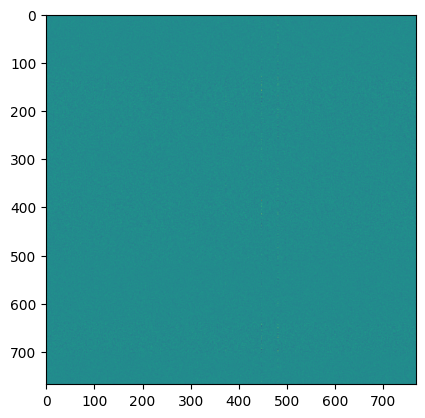

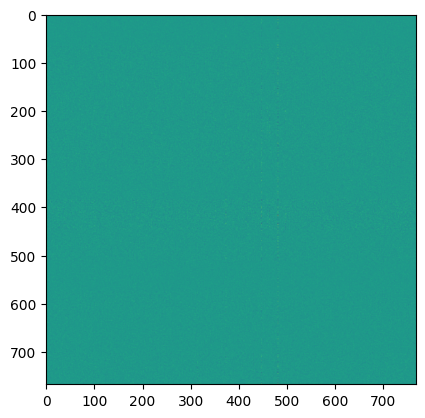

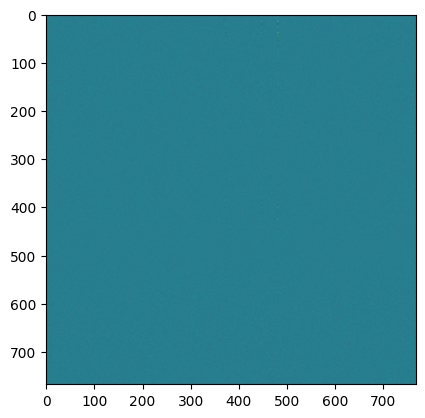

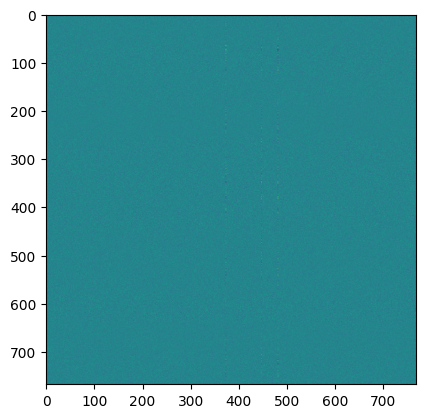

In [34]:
import time
for i in range(10):
    plt.imshow(sd_hf[f"transformer.h.{i}.attn.c_proj.weight"], cmap="viridis")
    plt.show()
    time.sleep(1)

In [14]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, but what I'm really doing is making a human-readable document. There are other languages, but those are"},
 {'generated_text': "Hello, I'm a language model, not a syntax model. That's why I like it. I've done a lot of programming projects.\n"},
 {'generated_text': "Hello, I'm a language model, and I'll do it in no time!\n\nOne of the things we learned from talking to my friend"},
 {'generated_text': "Hello, I'm a language model, not a command line tool.\n\nIf my code is simple enough:\n\nif (use (string"},
 {'generated_text': "Hello, I'm a language model, I've been using Language in all my work. Just a small example, let's see a simplified example."}]

In [1]:
768*4

3072

In [30]:
import torch
lower_triangular = torch.tril(torch.ones(5, 5))

lower_triangular

tensor([[1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.]])

In [31]:
# Method 2: More explicitly
# Create a matrix where lower triangle (including diagonal) is 1, upper triangle is 0
mask = torch.tril(torch.ones(5, 5))

# Convert all zeros (upper triangle) to -inf
# Where mask is 0, replace with -inf; where mask is 1, keep as is
mask = mask.masked_fill(mask == 0, float('-inf'))

In [58]:
a = torch.abs(torch.randn(5, 5))

In [59]:
a

tensor([[0.8277, 1.1390, 0.4853, 1.3053, 0.6797],
        [0.6811, 0.1325, 0.1023, 0.4463, 0.6919],
        [0.2743, 0.3615, 1.4822, 0.1059, 1.7340],
        [0.5720, 1.3172, 1.3345, 0.2559, 0.9140],
        [1.1539, 0.0372, 1.1201, 0.1652, 0.9492]])

In [60]:
mask

tensor([[1., -inf, -inf, -inf, -inf],
        [1., 1., -inf, -inf, -inf],
        [1., 1., 1., -inf, -inf],
        [1., 1., 1., 1., -inf],
        [1., 1., 1., 1., 1.]])

In [61]:
b = a*mask/(5**0.5)

In [62]:
b

tensor([[0.3702,   -inf,   -inf,   -inf,   -inf],
        [0.3046, 0.0592,   -inf,   -inf,   -inf],
        [0.1227, 0.1617, 0.6629,   -inf,   -inf],
        [0.2558, 0.5891, 0.5968, 0.1144,   -inf],
        [0.5161, 0.0166, 0.5009, 0.0739, 0.4245]])

In [3]:
import torch.nn as nn

In [66]:
nn.functional.softmax(b, dim=1)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5610, 0.4390, 0.0000, 0.0000, 0.0000],
        [0.2662, 0.2768, 0.4569, 0.0000, 0.0000],
        [0.2141, 0.2988, 0.3011, 0.1859, 0.0000],
        [0.2411, 0.1463, 0.2375, 0.1550, 0.2200]])

In [3]:
import torch

In [69]:
transformer = nn.ModuleDict({
            "wte": nn.Embedding(50257, 10),
            "wpe": nn.Embedding(1024, 10),
            "h": nn.ModuleList([
                nn.Embedding(1024, 10) for i in range(10)
            ]),
        })

In [16]:
token = torch.randint(1,100,(4,50))
token

tensor([[72, 85, 18, 19, 49, 32, 56, 72, 86, 66, 84, 56, 23, 46,  8, 57, 79, 79,
         83, 51, 57, 99, 88, 71, 65, 90, 72, 17, 48, 60, 85, 21,  5,  7,  6, 11,
         49, 96, 40, 42, 16, 62, 66, 19, 73, 79, 94, 47, 46, 29],
        [ 4, 12, 43, 47,  6, 97, 10, 18,  9, 48, 29, 81, 26, 88, 40, 56, 69, 32,
         45, 99, 41, 59, 35, 10, 55, 65, 83, 85, 62, 84, 30, 18, 48, 28, 78, 47,
         30, 68, 61, 92, 54, 25, 65, 71, 33, 82, 82, 62, 55, 71],
        [ 7, 44,  1, 47, 83, 31, 43, 45, 70, 25,  3, 66, 85, 44, 87, 89,  1, 72,
         81,  5, 20, 37, 45,  1, 79, 61,  1, 14, 71, 44, 90, 41,  7, 89, 88, 20,
         22, 63, 68, 63, 28, 14, 48, 94,  6, 46, 74, 45, 57, 59],
        [ 8, 67, 45, 52, 91, 97, 86, 42,  2, 61, 23, 78, 72, 92, 17,  2, 75, 54,
         99, 44,  2, 26, 99,  7, 27, 27, 61, 16, 49, 45, 62, 60, 86, 20, 75, 95,
         12,  9,  4, 83, 77, 38, 64,  2, 31, 84, 94,  3, 14, 97]])

In [68]:
transformer.wte(token.view(-1)).view(4,50,-1).shape

torch.Size([4, 50, 10])

In [27]:
transformer.wpe(torch.stack([torch.arange(50)] * 4)).view(4,50,-1).shape

torch.Size([4, 50, 10])

In [32]:
transformer.h[0](token.view(-1))

tensor([[-1.8511, -0.0963,  0.3952,  ...,  0.4942,  0.0263, -0.5028],
        [-0.3662,  0.5483,  0.4940,  ...,  2.1305,  0.8409,  0.1932],
        [ 0.9888,  1.5408,  0.2237,  ...,  0.6586, -1.2910, -0.9379],
        ...,
        [-1.7333, -1.8391,  0.2050,  ...,  0.0775, -1.0593,  0.4350],
        [ 1.6875,  0.2191,  0.0556,  ..., -0.4234,  0.8317, -0.5358],
        [-1.0433, -1.6286,  0.0837,  ..., -0.0885,  0.3574, -0.8541]],
       grad_fn=<EmbeddingBackward0>)

In [ ]:
def get_text_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        text_data = f.read()
    return text_data

# Load dataset
text_data = get_text_data('/home/abhishek/Desktop/temp/angrek_gpt2/input.txt')

In [36]:
text_data[:100]

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'

In [4]:
import tiktoken

In [40]:
enc = tiktoken.encoding_for_model("gpt-2")

In [44]:
tokens = enc.encode(text_data[:100])
tokens

[5962,
 22307,
 25,
 198,
 8421,
 356,
 5120,
 597,
 2252,
 11,
 3285,
 502,
 2740,
 13,
 198,
 198,
 3237,
 25,
 198,
 5248,
 461,
 11,
 2740,
 13,
 198,
 198,
 5962,
 22307,
 25,
 198,
 1639]

In [45]:
text = enc.decode(tokens)
text

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'

In [21]:
def get_text_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        text_data = f.read()
    return text_data
text_data = get_text_data('/home/abhishek/Desktop/temp/angrek_gpt2/input.txt')
import tiktoken
enc = tiktoken.encoding_for_model("gpt-2")
tokens = enc.encode(text_data)

In [27]:
from torch.utils.data import Dataset, DataLoader

class GPT2Dataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index]

gpt_data = GPT2Dataset(tokens)
gpt_dataloader = DataLoader(gpt_data, batch_size=4, shuffle=True, num_workers=2)
for batch in gpt_dataloader:
    print(batch)
    break

tensor([    0,   314, 12389,   761])


In [ ]:
import tiktoken
class DataLoaderLite:
    def __init__(self, B, T):
        with open("/home/abhishek/Desktop/temp/angrek_gpt2/input.txt", 'r', encoding='utf-8') as f:
            text_data = f.read()
        enc = tiktoken.encoding_for_model("gpt-2")
        tokens = enc.encode(text_data)
        self.data = torch.tensor(tokens)
        self.batch_size = B
        self.context = T
        self.current_position = 0

    def next_batch(self):
        buf = self.data[self.current_position:self.current_position+self.batch_size*self.context+1]
        x = buf[:self.batch_size*self.context].view(self.batch_size, self.context)
        y = buf[1:self.batch_size*self.context+1].view(self.batch_size, self.context)
        self.current_position += self.batch_size*self.context
        if self.current_position + self.batch_size*self.context + 1 > self.data.size(-1):
            self.current_position = 0
        return x, y

In [61]:
token_tensor = torch.tensor(tokens[:24]).view([4,6])

In [66]:
token_tensor.shape

torch.Size([4, 6])

In [71]:
y = transformer.wte(token_tensor)
y.shape

torch.Size([4, 6, 10])

In [17]:
import torch.nn as nn
import pdb

class GPTConfig:
    block_size: int = 1024
    vocab_size: int = 50257
    n_layer: int = 12
    n_head: int = 4
    n_embd: int = 768

class Block(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.ln_1 = nn.LayerNorm(config.n_embd)
        self.attn = CausalSelfAttention(config)
        self.ln_2 = nn.LayerNorm(config.n_embd)
        self.mlp = MLP(config)
    
    def forward(self, x):
        x = x+self.attn(self.ln_1(x))
        x = x+self.mlp(self.ln_2(x))
        return x

class MLP(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.c_fc = nn.Linear(config.n_embd, config.n_embd*4)
        self.c_proj = nn.Linear(config.n_embd*4, config.n_embd)
        self.gelu = nn.GELU(approximate='tanh')

    def forward(self, x):
        x = self.c_fc(x)
        x = self.gelu(x)
        x = self.c_proj(x)
        return x

class CausalSelfAttention(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.c_attn = nn.Linear(config.n_embd, 3*config.n_embd)
        self.c_proj = nn.Linear(config.n_embd, config.n_embd)
        self.n_embd = config.n_embd
        self.n_head = config.n_head
        self.config = config
        self.register_buffer("bias", torch.tril(torch.ones(config.block_size,config.block_size)).view(1, 1, config.block_size, config.block_size))

    def forward(self, x):
        B,T,C = x.size()
        qkv = self.c_attn(x)
        q, k, v = qkv.split(self.n_embd, dim=-1) # [batch_size, seq_length, n_embd]

        # Break into heads
        q = q.view(B,T,self.n_head,C//self.n_head).transpose(1,2) # (B, nh, T, hs)
        k = k.view(B,T,self.n_head,C//self.n_head).transpose(1,2) # (B, nh, T, hs)
        v = v.view(B,T,self.n_head,C//self.n_head).transpose(1,2) # (B, nh, T, hs)

        qkt = q @ k.transpose(-2, -1)
        qkt = qkt / math.sqrt(k.size(-1))

        # Make it autoregressive
        qkt = qkt.masked_fill(self.bias[:,:,:T,:T] == 0, float('-inf'))
        attn_weights = nn.functional.softmax(qkt, dim=-1)

        attn_out = attn_weights @ v
        attn_out = attn_out.transpose(1, 2).contiguous().view(B, T, C) # re-assemble all head outputs side by side
        return self.c_proj(attn_out)

class GPT(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.config = config
    
        self.transformer = nn.ModuleDict({
            "wte": nn.Embedding(config.vocab_size, config.n_embd),
            "wpe": nn.Embedding(config.block_size, config.n_embd),
            "h": nn.ModuleList([
                Block(config) for i in range(config.n_layer)
            ]),
            "ln_f": nn.LayerNorm(config.n_embd),
        })
        self.lm_head = nn.Linear(config.n_embd, config.vocab_size, bias=False)

        self.apply(self.init_weights)

    def init_weights(self, module):
        if (isinstance(module, nn.Embedding)):
            pdb.set_trace()
            pass
gpt = GPT(GPTConfig())

> /tmp/ipykernel_9886/1393466759.py(88)init_weights()
     85     def init_weights(self, module):
     86         if (isinstance(module, nn.Embedding)):
     87             pdb.set_trace()
---> 88             pass
     89 gpt = GPT(GPTConfig())

['T_destination', '__annotations__', '__call__', '__class__', '__constants__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_backward_hooks', '_backward_pre_hooks', '_buffers', '_call_impl', '_compiled_call_impl', '_fill_padding_idx_with_zero', '_forward_hooks', '_forward_hooks_always_called', '_forward_hooks_with_kwargs', '_forward_pre_hooks', '_forward_pre_hooks_with_kwargs', '_get_backward_hooks', '_get_